LinregressResult(slope=2.4391099055293637, intercept=-147.6460723805951, rvalue=0.6985414096486391, pvalue=1.5526772293928758e-17, stderr=0.23931937849409174)


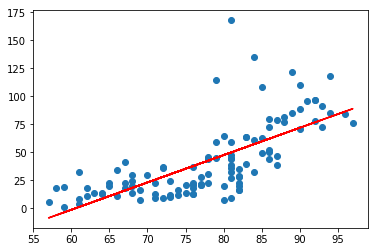

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import pandas as df






#data loading
data=pd.read_csv('./data/ozone/ozone.csv', sep=",")

#nan 지우기
data1=data.dropna(how= "any", inplace=False ) #원본 보존

x=data1["Temp"]
y=data1["Ozone"]

result=stats.linregress(x,y)

print(result)
w=result[0]
b=result[1]

h=w*x+b

plt.scatter(x,y)

plt.plot(x,h,"r")

plt.show()


x=int(input("온도를 입력하세요"))

h=w*x+b

print("오존량:", h)



In [17]:

import tensorflow as tf
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings(action="ignore")
tf.reset_default_graph()
data=pd.read_csv("./data/admission/admission.csv" , sep=",") #sep 는 csv가 ,로 구분되어있어서 defalt 값??
       
data_x = data[["gre","gpa","rank"]]
data_y = data["admit"]

pclass_dummies = pd.get_dummies(data_x["rank"],prefix="rank")
data_x= data_x.join(pclass_dummies)
data_x.drop("rank", axis=1 , inplace=True )

logit = sm.Logit(data_y,data_x)#모델생성 #레이블 먼저 넣고 그다음 값 

result=logit.fit()#학습과정


### 입력값받고 처리하는 부분

data=pd.read_csv("./data/admission/admission.csv" , sep=",") 
data_x = data[["gre","gpa","rank"]]
data_y = data["admit"]


testdata_x=[int(input("gre입력:")),int(input("gpa입력:")),int(input("rank입력:"))]
data_len=int(len(data_x))
print(data_len)
data_x.loc[data_len] = testdata_x

pclass_dummies = pd.get_dummies(data_x["rank"],prefix="rank")
data_x= data_x.join(pclass_dummies)
data_x.drop("rank", axis=1 , inplace=True )

data_x=pd.DataFrame(data_x.loc[(data_len)])
#data_x=data_x.loc[int(len(data_x)-1)]
data_x=data_x.transpose()

display(data_x)

### 입력값받고 처리하는 부분


result1=result.predict(data_x)#예측



predict = tf.cast(result1>0.5 ,dtype=tf.float32) 

sess=tf.Session() #새션

sess.run(tf.global_variables_initializer()) #런과 초기화
predict_value = sess.run(predict)

if predict_value==1:
    print("admit=1 합격입니다")
else:
    print("admit=0 불합격입니다")



Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6
gre입력:1000
gpa입력:3
rank입력:3
400


,gre,gpa,rank_1,rank_2,rank_3,rank_4
400,1000.0,3.0,0.0,0.0,1.0,0.0


admit=0 불합격입니다
